In [798]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression as lm
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [765]:
cars = pd.read_csv("./CarPrice_Assignment.csv")
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [766]:
cars.shape

(205, 26)

In [767]:
cars.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [768]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [769]:
pd.set_option('display.max_columns', None)
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [770]:
cars["doornumber"].unique()

array(['two', 'four'], dtype=object)

In [771]:
def change_doornumber(x):
    if x == 'two':
        return 2
    if x == 'four':
        return 4

In [772]:
cars["doornumber"]=cars["doornumber"].apply(change_doornumber)

In [773]:
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [774]:
cars["cylindernumber"].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [775]:
def change_cylindernumber(x):
    if x == 'two':
        return 2
    if x == 'three':
        return 3
    if x == 'four':
        return 4
    if x == 'five':
        return 5
    if x == 'six':
        return 6
    if x == 'eight':
        return 8
    if x == 'twelve':
        return 12
    

In [776]:
cars["cylindernumber"]=cars["cylindernumber"].apply(change_cylindernumber)

In [777]:
cars['cylindernumber'] = cars['cylindernumber'].astype(int)
cars['doornumber'] = cars['doornumber'].astype(int)
cars['enginesize'] = cars['enginesize'].astype(int)
cars['car_ID'] = cars['car_ID'].astype(int)
cars['symboling'] = cars['symboling'].astype(int)
cars['curbweight'] = cars['curbweight'].astype(int)
cars['enginesize'] = cars['enginesize'].astype(int)
cars['horsepower'] = cars['horsepower'].astype(int)
cars['peakrpm'] = cars['peakrpm'].astype(int)
cars['citympg'] = cars['citympg'].astype(int)
cars['highwaympg'] = cars['highwaympg'].astype(int)

In [778]:
cars['CompanyName']=cars['CarName'].apply(lambda x : x.split()[0])

In [779]:
cars.drop('CarName',axis=1,inplace=True)
cars.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName
0,1,3,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [780]:
cars['CompanyName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [781]:
cars['CompanyName']=cars['CompanyName'].str.lower()
def replace_name(a,b):
    cars.replace(a,b,inplace=True)

In [782]:
replace_name("maxda","mazda")
replace_name("porcshce","porsche")
replace_name("toyouta","toyota")
replace_name("vokswagen","volkswagen")
replace_name("vw","volkswagen")
cars['CompanyName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

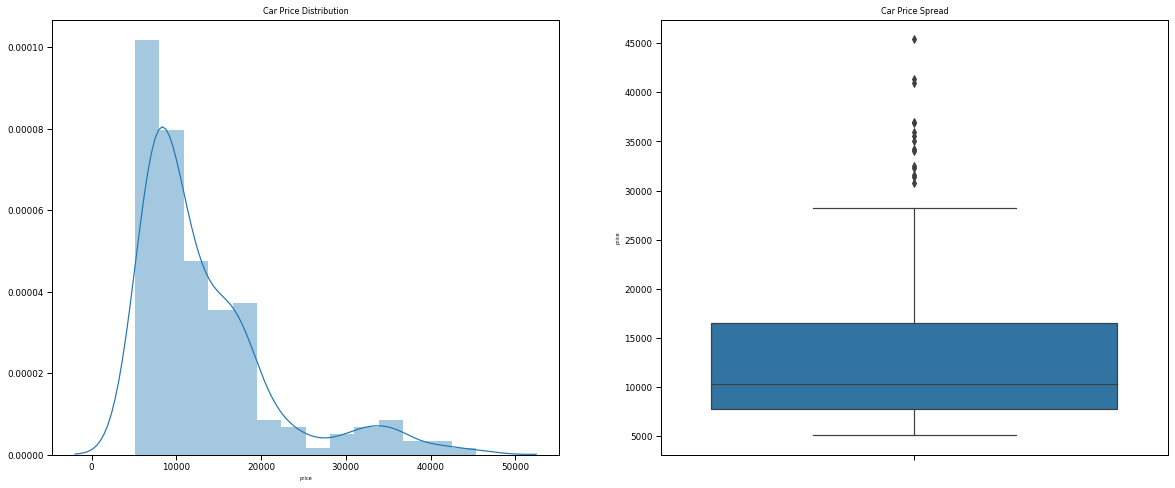

In [783]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.title('Car Price Distribution')
sns.distplot(cars.price)
plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=cars.price)

In [784]:
cars['price'].describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1])

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
85%      18500.000000
90%      22563.000000
100%     45400.000000
max      45400.000000
Name: price, dtype: float64

Text(0, 0.5, 'Frequency of Car type')

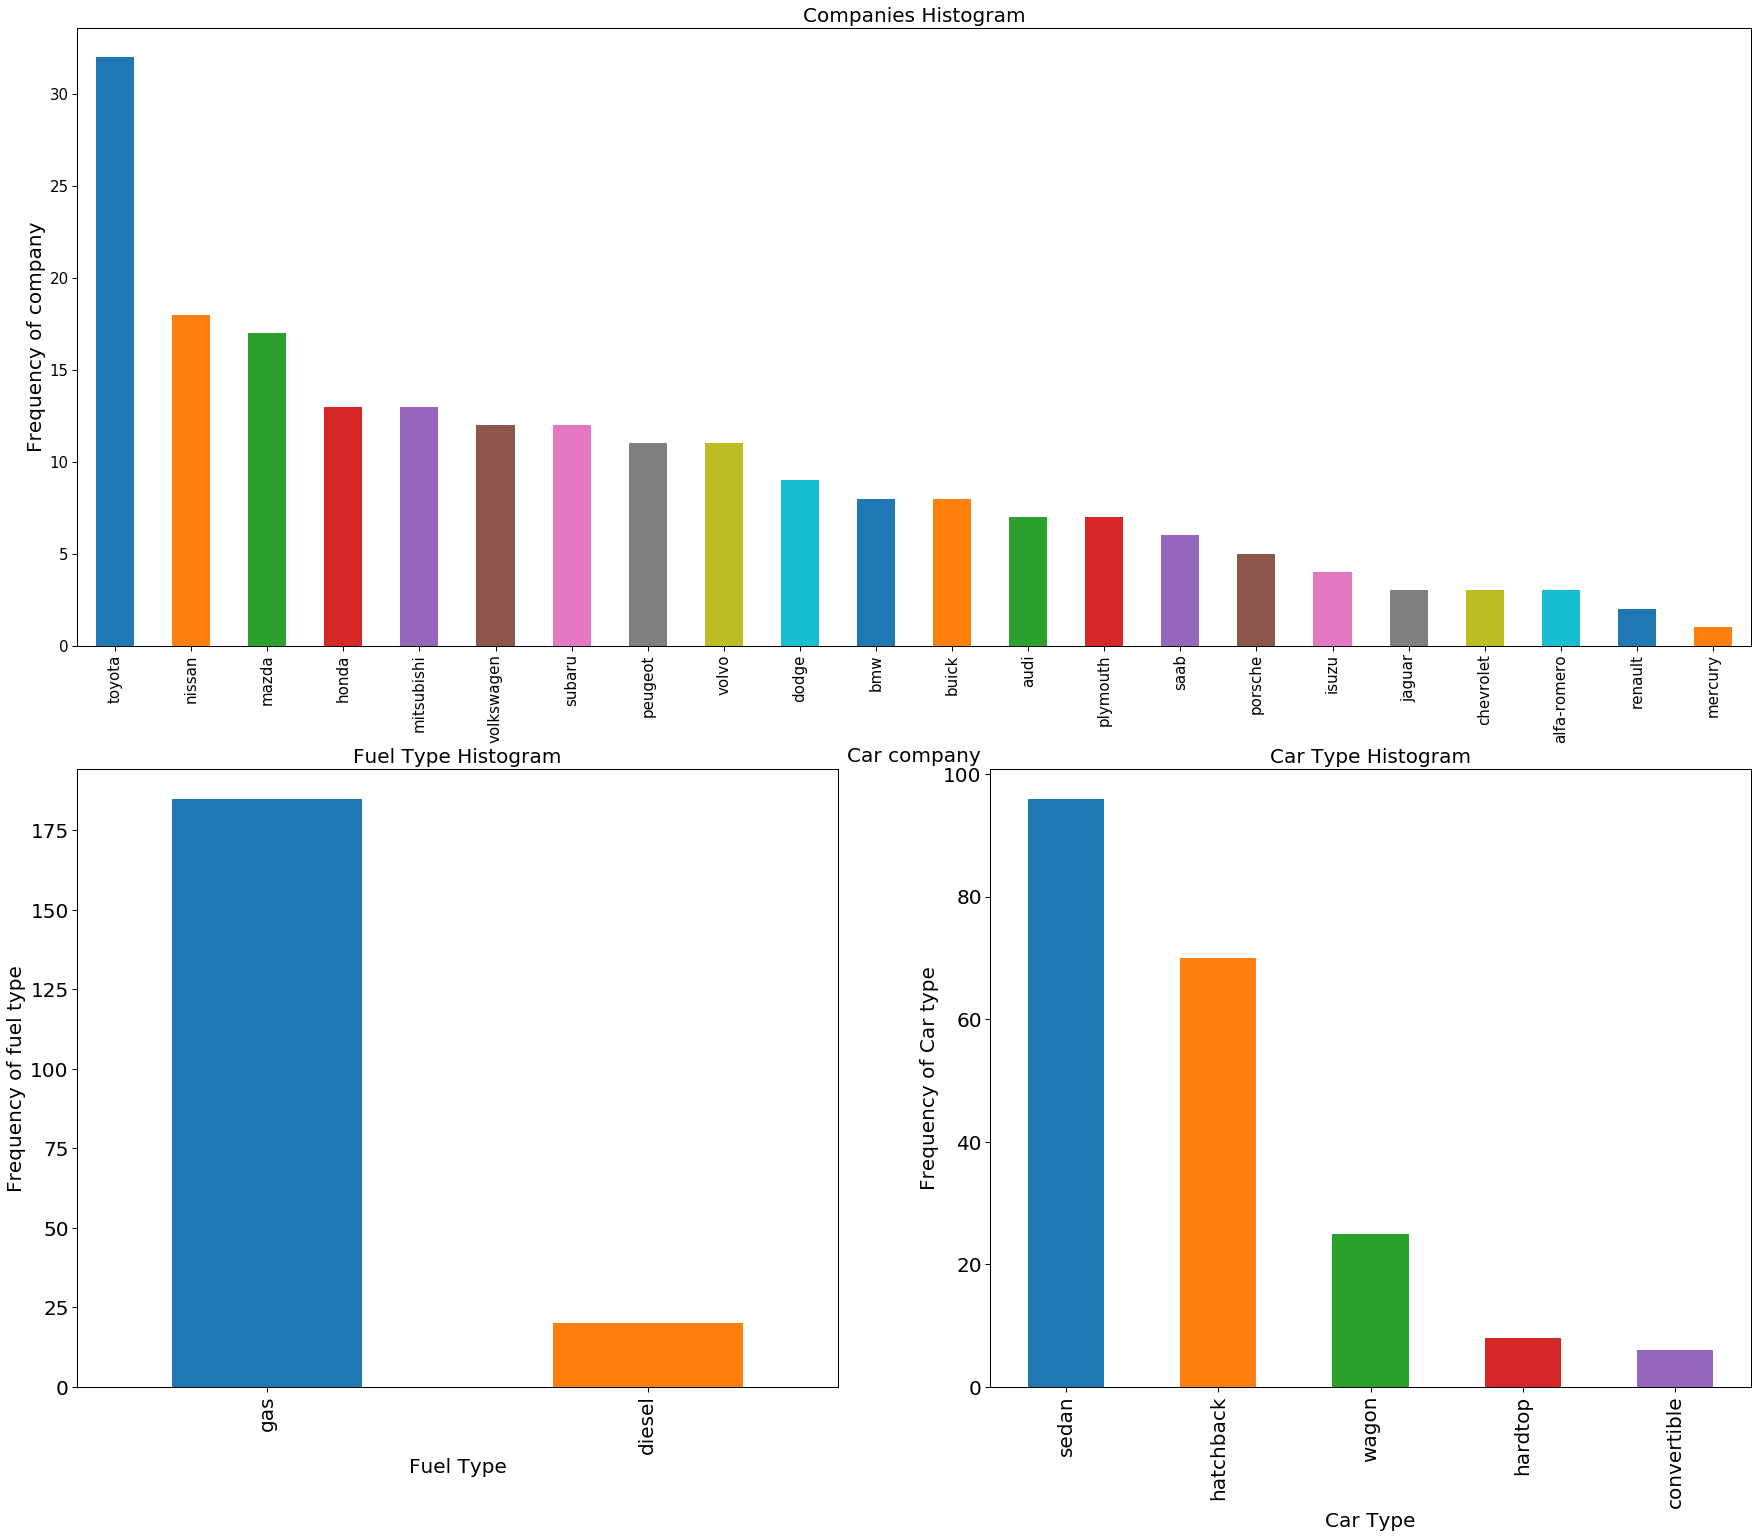

In [785]:
color=sns.color_palette()
fig, ax = plt.subplots(figsize=(30,25))
ax1 = plt.subplot(211)
plt1 = cars['CompanyName'].value_counts().plot(kind='bar',color=color,fontsize=15)
plt.xlabel('Car company',fontsize=20) 
plt.ylabel('Frequency of company',fontsize=20)
plt.title(label='Companies Histogram',color="black",fontsize=20)

ax2 = plt.subplot(223)
plt1 = cars['fueltype'].value_counts().plot(kind='bar',color=color,fontsize=20)

plt.title('Fuel Type Histogram',color="black",fontsize=20)
plt.xlabel('Fuel Type',fontsize=20) 
plt.ylabel('Frequency of fuel type',fontsize=20)

ax3 = plt.subplot(224)
plt1 = cars['carbody'].value_counts().plot(kind='bar',color=color,fontsize=20)
plt.title('Car Type Histogram',color="black",fontsize=20)
plt.xlabel('Car Type',fontsize=20) 
plt.ylabel('Frequency of Car type',fontsize=20)

Text(0.5, 1.0, 'Symboling vs Price')

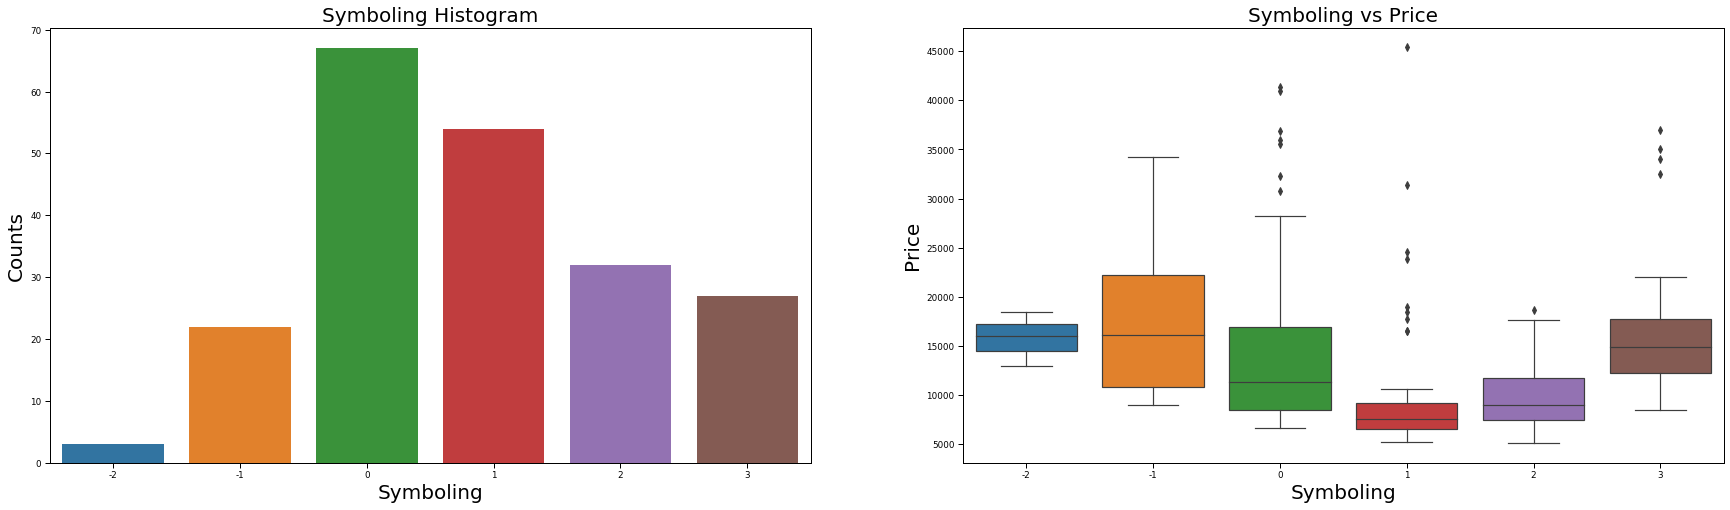

In [786]:
color=sns.color_palette()
fig, ax = plt.subplots(figsize=(30,8))

ax1 = plt.subplot(121)
sns.countplot(cars.symboling,palette=color)
plt.title('Symboling Histogram',fontsize=20)
ax1.set_xlabel("Symboling",fontsize=20)
ax1.set_ylabel("Counts",fontsize=20)

ax2 = plt.subplot(122)
sns.boxplot(x=cars.symboling, y=cars.price, palette=color)
ax2.set_xlabel("Symboling",fontsize=20)
ax2.set_ylabel("Price",fontsize=20)
plt.title('Symboling vs Price',fontsize=20)


Text(0, 0.5, 'Average Price')

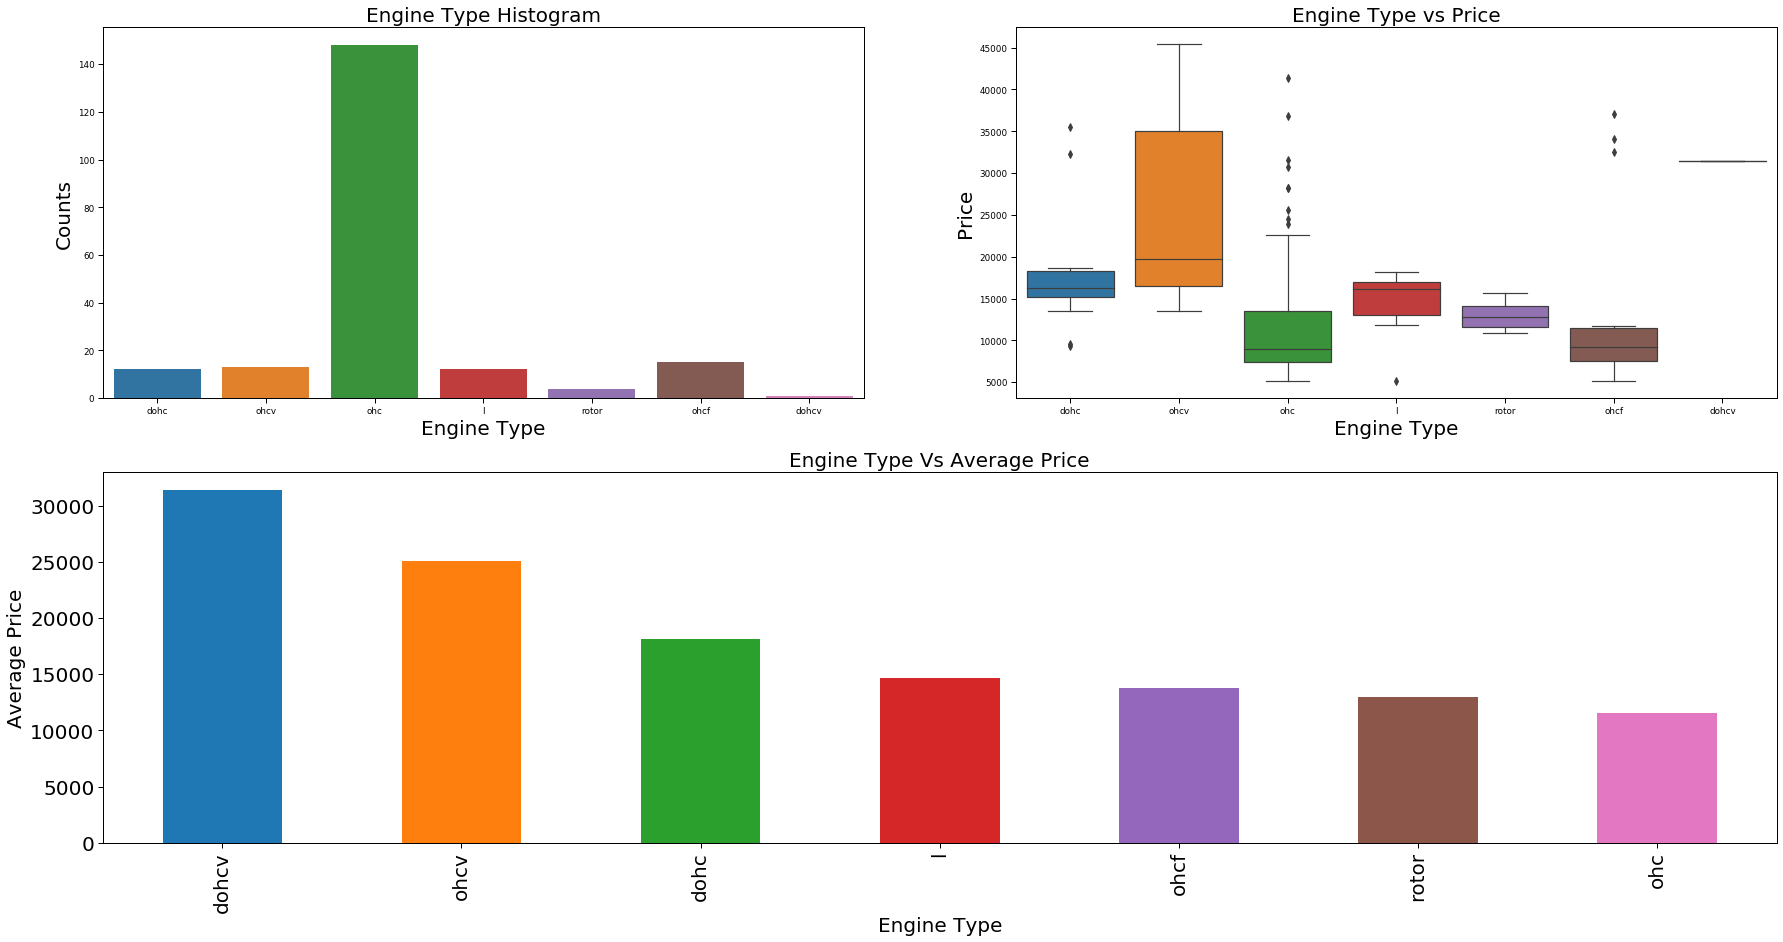

In [787]:
color=sns.color_palette()
fig, ax = plt.subplots(figsize=(30,15))
ax1 = plt.subplot(221)
sns.countplot(cars['enginetype'],palette=color)
plt.title('Engine Type Histogram',fontsize=20)
ax1.set_xlabel("Engine Type",fontsize=20)
ax1.set_ylabel("Counts",fontsize=20)

ax2 = plt.subplot(222)
sns.boxplot(x=cars['enginetype'], y=cars['price'], palette=color)
ax2.set_xlabel("Engine Type",fontsize=20)
ax2.set_ylabel("Price",fontsize=20)
plt.title('Engine Type vs Price',fontsize=20)

ax3 = plt.subplot(212)
grouped = cars.groupby(['enginetype'])
grouped=grouped['price'].agg(np.mean).sort_values(ascending=False)
grouped.plot.bar(color=color,fontsize=20)
plt.title('Engine Type Vs Average Price',color="black",fontsize=20)
plt.xlabel('Engine Type',fontsize=20) 
plt.ylabel('Average Price',fontsize=20)

In [788]:
## Create a model and fit it

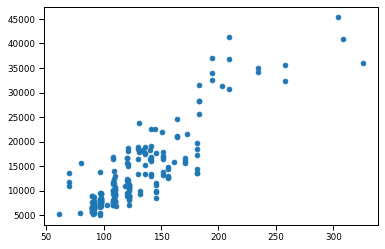

In [789]:
np.random.seed(42)
X = np.asarray(cars['enginesize']).reshape(-1, 1)
y = np.asarray(cars['price']).reshape(-1, 1)
plt.scatter(X, y)

In [790]:
np.corrcoef(cars['price'], cars['enginesize'])[0, 1]

0.8741448025245112

In [791]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [792]:
X_train.shape

(164, 1)

In [793]:
X_test.shape

(41, 1)

In [794]:
model = LinearRegression().fit(X_train, y_train)
r_sq = model.score(X_train,y_train)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.7507055061579612


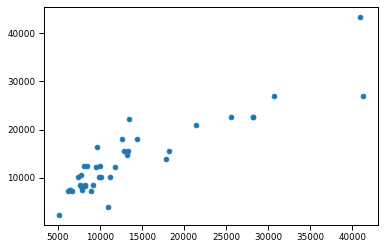

In [796]:
predictions  = model.predict(X_test)
plt.scatter(y_test, predictions)

(array([ 2.,  2.,  9., 15.,  6.,  3.,  3.,  0.,  0.,  1.]),
 array([-8777.10075638, -6459.86553155, -4142.63030672, -1825.39508189,
          491.84014294,  2809.07536777,  5126.31059259,  7443.54581742,
         9760.78104225, 12078.01626708, 14395.25149191]),
 <a list of 10 Patch objects>)

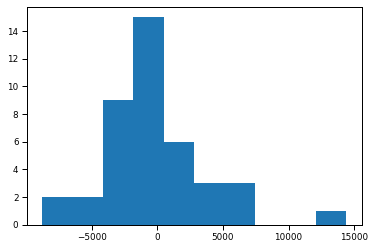

In [797]:
plt.hist(y_test - predictions)

In [799]:
metrics.mean_absolute_error(y_test, predictions)

2748.6947032901094

In [800]:
metrics.mean_squared_error(y_test, predictions)

15465458.965908466

In [802]:
r_sq = model.score(X_test,y_test)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.8040958796678975
